In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data[iris.target < 2]
y = iris.target[iris.target < 2]

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x,y,stratify = y, random_state = 7)
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc_clf = SVC(kernel = 'linear').fit(x_train, y_train)
svc_scores = cross_val_score(svc_clf, x_train, y_train, cv = 4)

svc_scores.mean()

1.0

In [3]:
from sklearn.svm import SVR
svr_clf = SVR(kernel = 'linear').fit(x_train, y_train)

In [4]:
from sklearn.metrics import make_scorer
def for_scorer(y_test, orig_y_pred):
    y_pred = np.rint(orig_y_pred).astype(np.int)
    return accuracy_score(y_test, y_pred)

In [5]:
svr_to_class_scorer = make_scorer(for_scorer, greater_is_better = True)
svr_scores = cross_val_score(svr_clf, x_train, y_train, cv = 4, scoring = svr_to_class_scorer)
svr_scores.mean()

1.0

In [6]:
from sklearn import datasets
datasets.make_biclusters
datasets.make_blobs
datasets.make_checkerboard
datasets.make_circles
datasets.make_classification

import sklearn.datasets as d
import numpy as np

reg_data = d.make_regression()
complex_reg_data = d.make_regression(1000, 10, 5 , 2, 1.0)
complex_reg_data[0].shape

(1000, 10)

In [7]:
classification_set = d.make_classification(weights = [0.1])
np.bincount(classification_set[1])

array([10, 90], dtype=int32)

In [8]:
blobs_data, blobs_target = d.make_blobs()

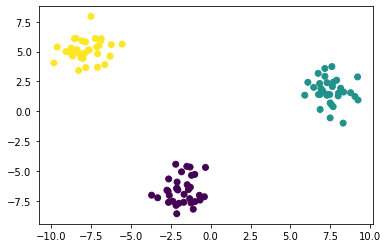

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(blobs_data[:,0],blobs_data[:,1],c = blobs_target)

In [12]:
from sklearn import preprocessing
import numpy as np 
from sklearn.datasets import load_boston
boston = load_boston()
x,y = boston.data, boston.target

In [13]:
x[:, :3].mean(axis = 0)

array([ 3.61352356, 11.36363636, 11.13677866])

In [14]:
x[:,:3].std(axis = 0)

array([ 8.59304135, 23.29939569,  6.85357058])

In [15]:
x_2 = preprocessing.scale(x[:, :3])
x_2.mean(axis = 0)

array([-8.78743718e-17, -6.34319123e-16, -2.68291099e-15])

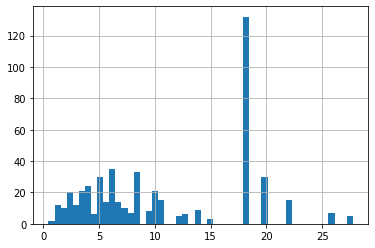

In [16]:
pd.Series(x[:,2]).hist(bins = 50)

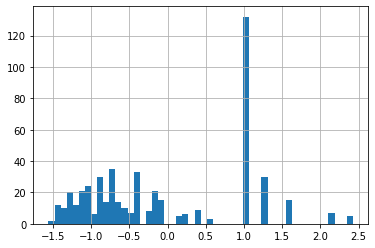

In [18]:
pd.Series(preprocessing.scale(x[:,2])).hist(bins = 50)

In [22]:
my_scaler = preprocessing.StandardScaler()
my_scaler.fit(x[:,:3])
my_scaler.transform(x[:,:3]).max(axis=0)

array([9.9339306 , 3.80423444, 2.42256516])

In [26]:
my_minmax_scaler = preprocessing.MinMaxScaler()
my_minmax_scaler.fit(x[:, :3])
my_minmax_scaler.transform(x[:, :3]).max(axis = 0)


array([1., 1., 1.])

In [27]:
my_minmax_scaler.transform(x[:, :3]).min(axis = 0)

array([0., 0., 0.])

In [29]:
my_odd_scaler = preprocessing.MinMaxScaler(feature_range = (-3.14,3.14))
normalized_x = preprocessing.normalize(x[:,:3])

In [30]:
(normalized_x * normalized_x).sum(axis = 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [31]:
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()
x, y = boston.data, boston.target.reshape(-1,1)

In [33]:
from sklearn import preprocessing
new_target =preprocessing.binarize(y,threshold = boston.target.mean())
new_target[:5]

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.]])

In [34]:
(y[:5] > y.mean()).astype(int)

array([[1],
       [0],
       [1],
       [1],
       [1]])

In [35]:
binar = preprocessing.Binarizer(y.mean())
new_target = binar.fit_transform(y)
new_target[:5]

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.]])

In [37]:
from scipy.sparse import coo
spar = coo.coo_matrix(np.random.binomial(1, .25, 100))
preprocessing.binarize(spar, threshold = 1)

<1x100 sparse matrix of type '<class 'numpy.int32'>'
	with 0 stored elements in Compressed Sparse Row format>

In [38]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

x = iris.data
y = iris.target

In [40]:
from sklearn import preprocessing
cat_encoder = preprocessing.OneHotEncoder()
cat_encoder.fit_transform(y.reshape(-1,1)).toarray()[:5]

c:\windows\python37-32\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [41]:
cat_encoder.transform(np.ones((3,1))).toarray()

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [43]:
from sklearn.linear_model import Ridge
ridge_inst = Ridge()
from sklearn.multioutput import MultiOutputRegressor
multi_ridge = MultiOutputRegressor(ridge_inst, n_jobs = -1)

In [ ]:
import numpy as np

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_x = boston.data
boston_y = boston.target
train_set = np.random.choice([True,False], len(boston_y),p=[0.75,0.25])


In [4]:
class Particle:
    def __init__(self, x,y,ang_vel):
        self.x = x
        self.y = y
        self.ang_vel = ang_vel
        v_x = -y / (x**2 + y**2)**0.5
        v_y = x / (x**2 + y**2)**0.5

In [6]:
import math

def f(x):
    return math.sqrt(x + 3) - x + 1

for x in [0,1,math.sqrt(2),math.sqrt(2)-1]:
    print("f({:.3f}) = {:.3f}".format(x,f(x)))

f(0.000) = 2.732
f(1.000) = 2.000
f(1.414) = 1.687
f(0.414) = 2.434


In [7]:
def plug():
    x = -100 #start at -100
    while x < 100:
        if 2*x + 5 == 13:
            print("x=",x)
        x+=1
plug()     

x= 4


In [9]:
def equation(a,b,c,d):
    return (d-b)/(a-c)
equation(2,5,0,13)
    

4.0

In [10]:
x = equation(12,18,-34,67)
x

1.065217391304348

In [11]:
from math import sqrt

def quad(a,b,c):
    x1 = (-b + sqrt(b**2 - 4*a*c))/(2*a)
    x2 = (-b - sqrt(b**2 - 4*a*c))/(2*a)
    return x1,x2

In [12]:
quad(2,7,-15)

(1.5, -5.0)

In [1]:
def g(x):
    return 6*x**3 + 31*x**2 + 3*x - 10

def plug():
    x = -100
    while x < 100:
        if g(x) == 0:
            print('x=',x)
        x += 1
    print("done")

In [2]:
plug()

x= -5
done


In [3]:
import random
target = "I never go back on my word, because that is my Ninja way"
characters="abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ.',?!'"
def makeList():
    '''Returns a list of characters the same length as the target'''
    charList = [] #empty list to fill with random characters
    for i in range(len(target)):
        charList.append(random.choice(characters))
    return charList

In [4]:
len(target)

56

In [7]:
newlist = makeList()

In [8]:
print(newlist)

['d', 'j', '!', 'C', '?', '!', 'r', 'V', 'J', 'l', 'S', 'Z', 'Z', 'L', 'k', 'm', 'W', 'f', 'a', "'", 'H', '.', 'Y', 'N', 'A', 'f', 'Q', "'", 'q', '.', 'd', 'u', 'v', 'w', 'L', 'U', 'z', 'C', 'W', "'", 'K', 'M', 'y', '?', 'w', 'Y', 'Q', 'S', 'f', 'd', 'o', 'A', 'm', 'h', 'h', 'g']


In [21]:
num = 16

# uncomment to take input from the user
#num = int(input("Enter a number: "))

if num < 0:
   print("Enter a positive number")
else:
   sum = 0
   # use while loop to iterate un till zero
   while(num > 0):
       sum += num
       num -= 1
   print("The sum is",sum)

The sum is 136
